In [15]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import  image
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
model = ResNet50(weights='imagenet') # Took almost 3 minutes to be downloaded in my case

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 174s 2us/step


### Read an Image from Cloud

In [ ]:
from PIL import Image
import requests
from io import BytesIO

url = "https://avatars.githubusercontent.com/u/129516589?v=4"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

img.show()  # This will display the image


### Read an Image from the Runtime Environment and make predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


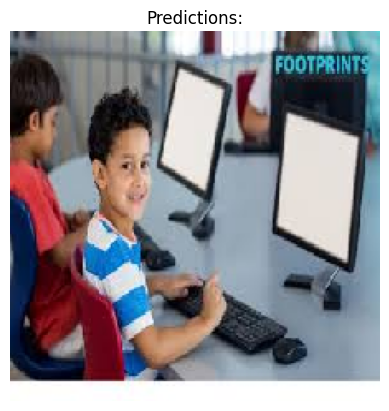

1. television: 23.53%
2. desktop_computer: 16.74%
3. monitor: 12.61%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


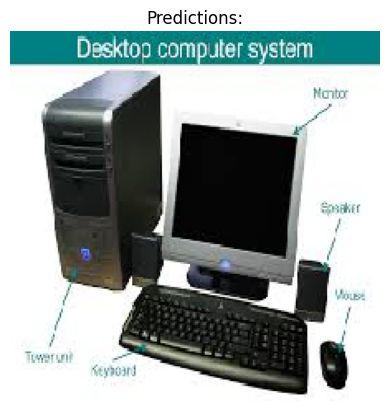

1. desktop_computer: 97.82%
2. monitor: 0.43%
3. computer_keyboard: 0.33%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


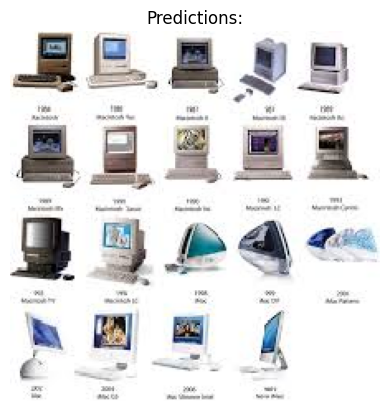

1. screen: 30.20%
2. oscilloscope: 20.36%
3. vending_machine: 18.80%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


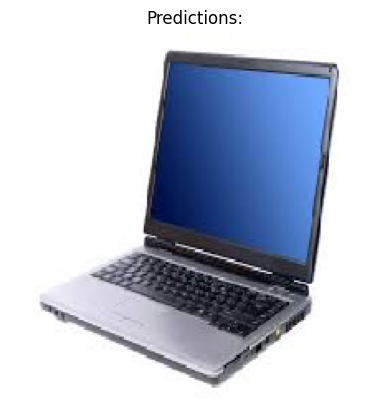

1. notebook: 58.99%
2. laptop: 24.30%
3. space_bar: 5.61%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


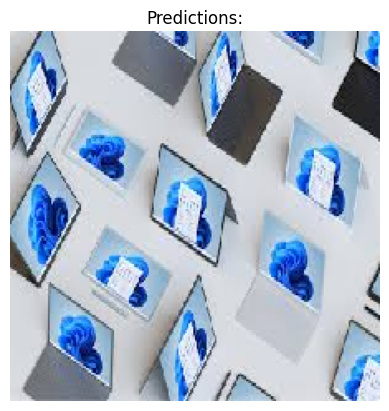

1. honeycomb: 76.67%
2. Windsor_tie: 6.10%
3. television: 2.51%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


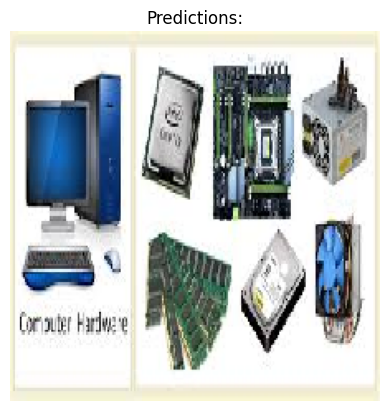

1. carpenter's_kit: 26.92%
2. desktop_computer: 20.23%
3. remote_control: 10.31%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


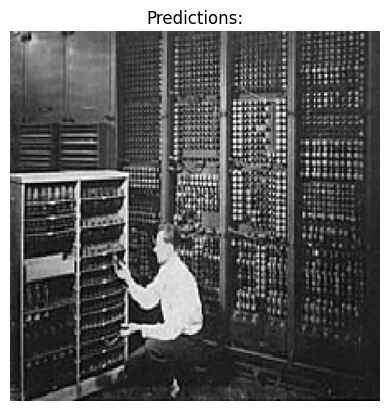

1. turnstile: 94.47%
2. prison: 5.10%
3. library: 0.12%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


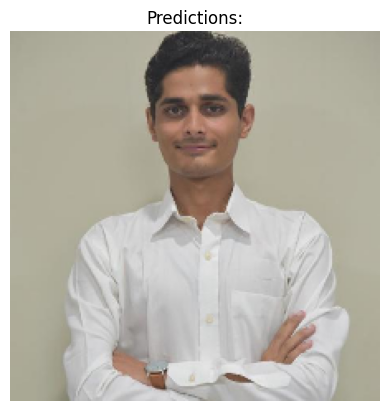

1. lab_coat: 97.70%
2. Windsor_tie: 0.51%
3. stethoscope: 0.21%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


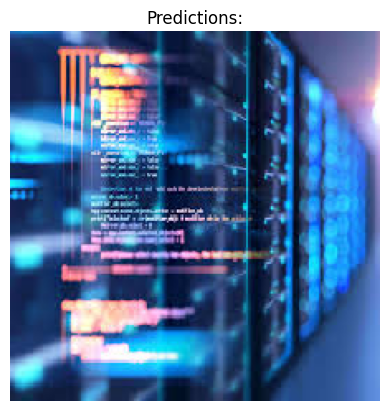

1. perfume: 30.23%
2. beaker: 19.93%
3. cassette: 7.31%


In [16]:
# Path to your images
folder_path = r"D:\Ao\Code\AI\deep-learning\notes\11-CNN\02-pretrained-models-keras-applications\assets"

# Get all image filenames
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in image_files:
    img_path = os.path.join(folder_path, img_name)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict
    preds = model.predict(x)
    top_preds = decode_predictions(preds, top=3)[0]

    # Show image and predictions
    plt.imshow(img)
    plt.axis('off')
    plt.title("Predictions:")
    plt.show()

    # Print predictions
    for i, pred in enumerate(top_preds):
        print(f"{i+1}. {pred[1]}: {pred[2]*100:.2f}%")

    input("\nPress Enter to see the next image...\n")